In [1]:
%load_ext autoreload
%autoreload 2
import os
os.chdir('/home/jorge/thesis')

import torch
from pytorch3d.io import load_objs_as_meshes

device = torch.device("cuda")
mesh = load_objs_as_meshes(["data/meshes/max-planck.obj"], device=device)
points = mesh.verts_list()[0].cpu()

/home/jorge/miniconda3/envs/thesis4/lib/python3.9/site-packages/pytorch3d/io/obj_io.py:546: UserWarning: No mtl file provided
  warnings.warn("No mtl file provided")


tensor([-0.2962, -0.5000, -0.3754])
tensor([0.2962, 0.5000, 0.3754])


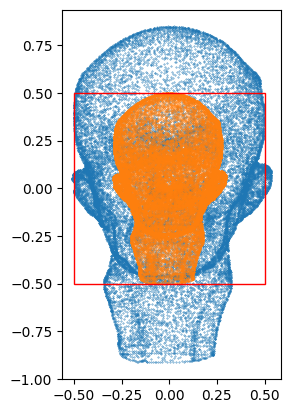

In [2]:
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle

from text3d2video.utilities.mesh_processing import normalize_point_cloud

normalized = normalize_point_cloud(points)

print(normalized.min(dim=0).values)
print(normalized.max(dim=0).values)

fig, ax = plt.subplots()

s = 0.1
ax.scatter(points[:, 0].cpu(), points[:, 1].cpu(), s=s)
ax.scatter(normalized[:, 0].cpu(), normalized[:, 1].cpu(), s=s)

r = Rectangle((-0.5, -0.5), 1, 1, fill=False, color="red")
ax.add_patch(r)
ax.set_aspect("equal")


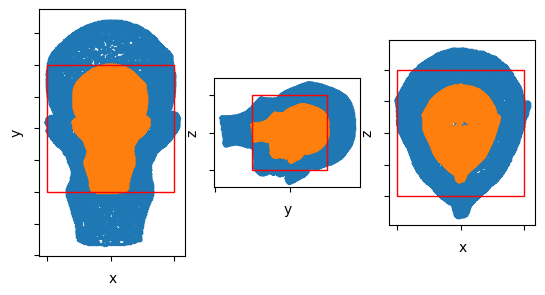

: 

In [4]:
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
from text3d2video.utilities.ipython_utils import view_pointcloud_orthographic
from text3d2video.utilities.mesh_processing import normalize_meshes

normalized = normalize_meshes(mesh)

fig, axs = plt.subplots(1, 3)

orientations = [(0, 1), (1, 2), (0, 2)]
for i, (h_dim, v_dim) in enumerate(orientations):
    ax = axs[i]

    view_pointcloud_orthographic(
        ax, mesh.verts_list()[0].cpu(), horizontal_dim=h_dim, vertical_dim=v_dim, s=2
    )
    view_pointcloud_orthographic(
        ax,
        normalized.verts_list()[0].cpu(),
        horizontal_dim=h_dim,
        vertical_dim=v_dim,
        s=2,
    )

    r = Rectangle((-0.5, -0.5), 1, 1, fill=False, color="red")
    ax.add_patch(r)

    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_aspect("equal")